In [1]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set_theme(style="darkgrid")

**Esempi vari con scatterplot e lineplot**

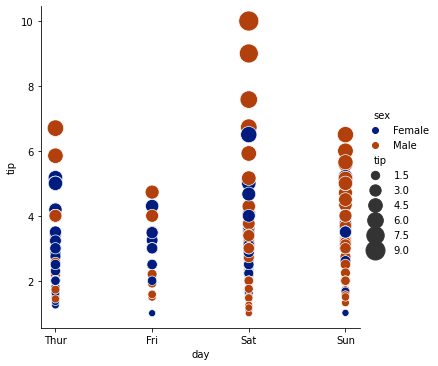

In [2]:
tips = sns.load_dataset("tips")
sns.relplot(x="day", y="tip", data=tips, hue="sex", hue_order=["Female","Male"],palette="dark", size="tip",sizes=(50, 400));
    

In [97]:
fl = sns.load_dataset("flights")
fl

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


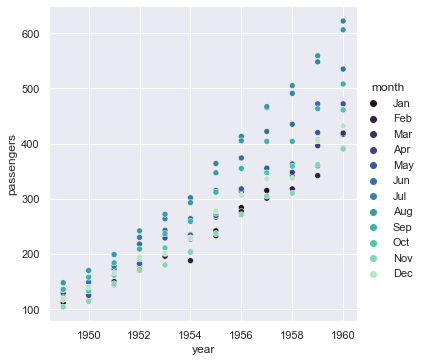

In [109]:
sns.relplot(x="year", y="passengers", data=fl, kind="scatter", hue="month", palette="mako");
#sns.scatterplot(x="year", y="passengers", data=fl)

**Questo di segito è un esempio di cattivo uso di subplotting (faceting):**
- sono troppi i subplot e con differenze poco distinguibili
- questa scelta **peggiora** la comunicazione visiva rispetto al caso precedente

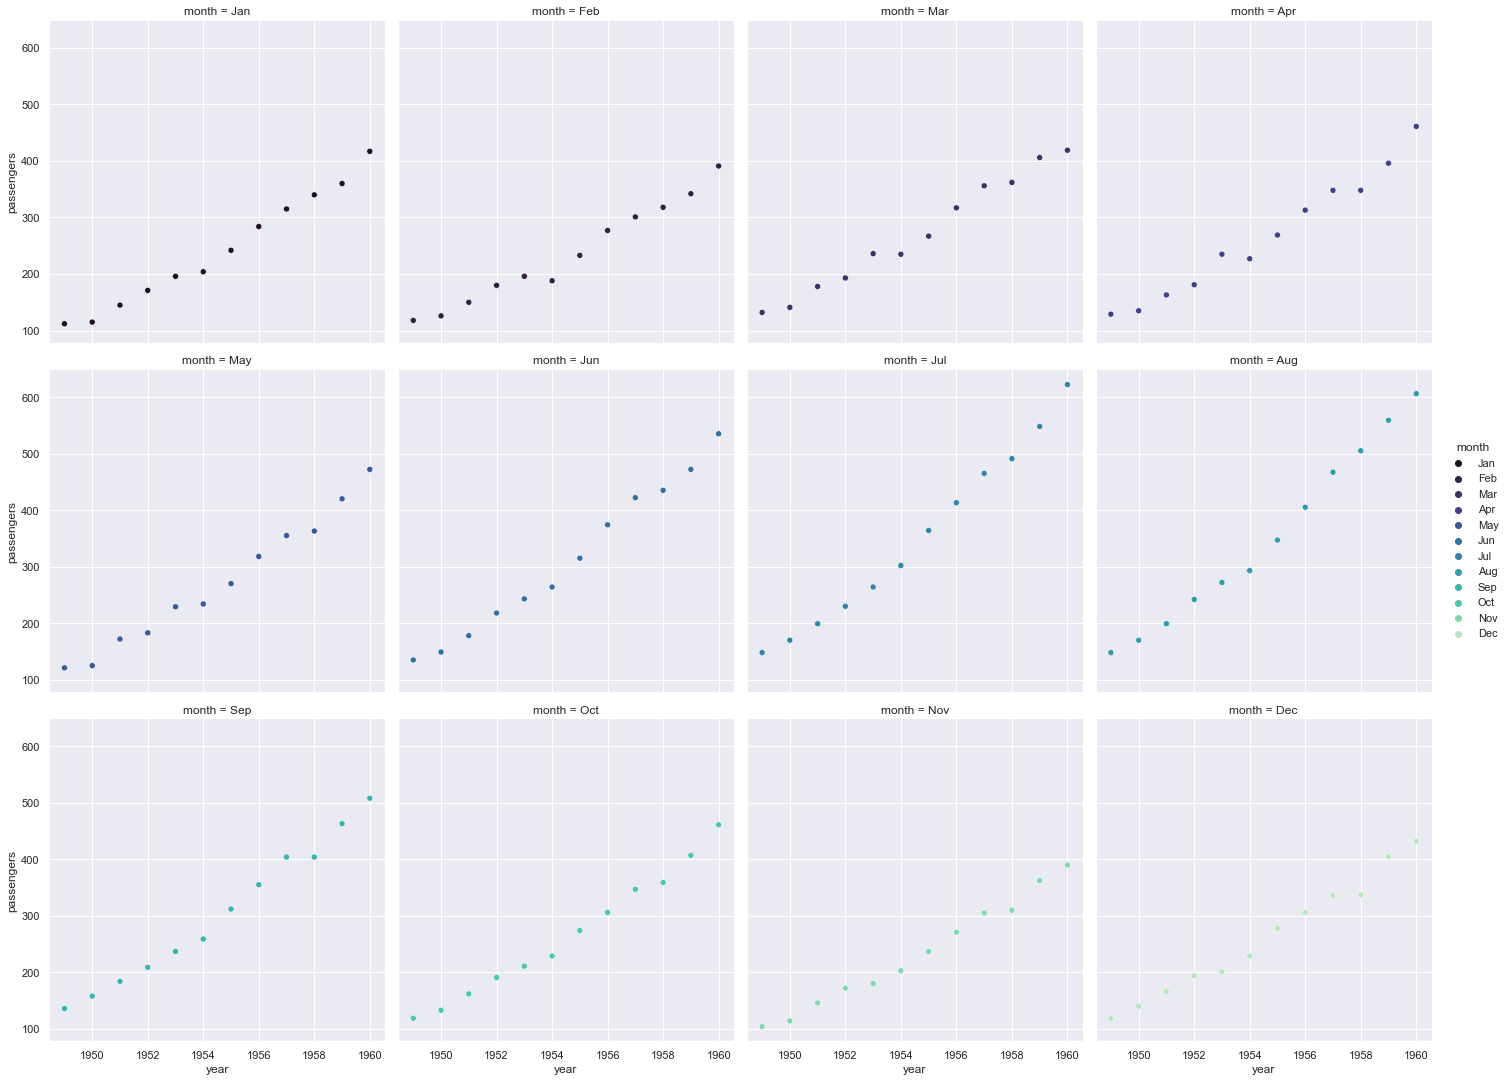

In [108]:
sns.relplot(x="year", y="passengers", data=fl, kind="scatter", hue="month", 
            palette="mako", col="month", col_wrap=4);

**Proviamo con qualche dataset reale di quelli che già conosciamo**

**ATTENZIONE all'opzione encoding='Latin-1'. Provare a toglierla, capire l'errore, cercare in rete la spiegazione**

In [4]:
reg = pd.read_csv('../data/regioni_pop.csv', sep =",", encoding='Latin-1')
reg

,Territorio,Maschi,Femmine,Totale,superficie,num_comuni,num_provincie
0,Abruzzo,637388,668382,1305770,10831.84,305.0,4.0
1,Basilicata,273941,282993,556934,10073.32,131.0,2.0
2,Calabria,942644,982057,1924701,15221.90,409.0,5.0
3,Campania,2820555,2965306,5785861,13670.95,550.0,5.0
4,Emilia-Romagna,2174599,2292519,4467118,22452.78,333.0,9.0
5,Friuli-Venezia Giulia,589215,622142,1211357,7862.30,216.0,4.0
6,Lazio,2832324,3033220,5865544,17232.29,378.0,5.0
7,Liguria,739021,804106,1543127,5416.21,235.0,4.0
8,Lombardia,4949770,5154199,10103969,23863.65,1524.0,12.0
9,Marche,738259,780141,1518400,9401.38,229.0,5.0


**Per usare facilmente una terza variabile in un grafico che definisce la relazione tra due variabili (asse x, asse y), come uno scatterplot o un lineplot, la si associa a una delle opzioni con le quali cambiamo i valori o lo stile dei punti o delle linee. Ma per fare questo ci serve avere il dataset organizzato con la variabile da usare nel grafico come colonna. Dobbiamo quindi avere la coppia di colonne chiave:valore.
Per questo è importante sapere fare bene la trasformazione da dataframe di tipo tidy (seaborn lo chiama wide-form dataframe) a datafame con coppia chiave:valore (seaborn lo chiama long-form dataframe). 
Qui di seguito lo facciamo per le colonne Maschi Femmine e Totale del dataframe reg che diventano le colonne chiave:valore Sesso:Popolazione del dataframe reg2.** 

In [5]:
reg2=reg.melt(
               id_vars=["Territorio", "superficie","num_comuni", "num_provincie"],  
               var_name="Sesso",             
               value_name="Popolazione")
reg2

,Territorio,superficie,num_comuni,num_provincie,Sesso,Popolazione
0,Abruzzo,10831.84,305.0,4.0,Maschi,637388
1,Basilicata,10073.32,131.0,2.0,Maschi,273941
2,Calabria,15221.90,409.0,5.0,Maschi,942644
3,Campania,13670.95,550.0,5.0,Maschi,2820555
4,Emilia-Romagna,22452.78,333.0,9.0,Maschi,2174599
5,Friuli-Venezia Giulia,7862.30,216.0,4.0,Maschi,589215
6,Lazio,17232.29,378.0,5.0,Maschi,2832324
7,Liguria,5416.21,235.0,4.0,Maschi,739021
8,Lombardia,23863.65,1524.0,12.0,Maschi,4949770
9,Marche,9401.38,229.0,5.0,Maschi,738259


**Ora possiamo usare la colonna Sesso per il parametro hue.**

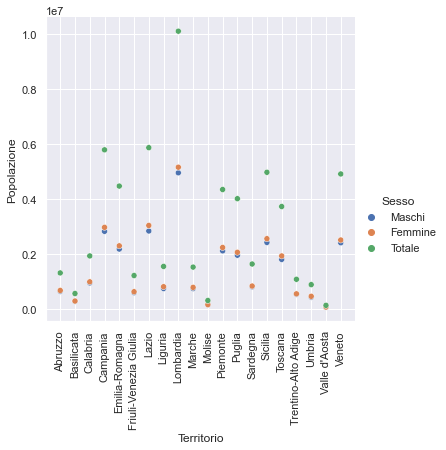

In [111]:
g=sns.relplot(x="Territorio", y="Popolazione", data=reg2, kind="scatter", hue="Sesso");
g.set_xticklabels(rotation=90)

**Rifacciamo, ma questa volta usiamo solo le colonne Maschio e Femmina di reg come chiavi della nuova colonna Sesso**

In [74]:
reg3=reg.melt(
               id_vars=["Territorio", "Totale", "superficie","num_comuni", "num_provincie"],  
               var_name="Sesso",             
               value_name="Popolazione")
reg3

,Territorio,Totale,superficie,num_comuni,num_provincie,Sesso,Popolazione
0,Abruzzo,1305770,10831.84,305.0,4.0,Maschi,637388
1,Basilicata,556934,10073.32,131.0,2.0,Maschi,273941
2,Calabria,1924701,15221.90,409.0,5.0,Maschi,942644
3,Campania,5785861,13670.95,550.0,5.0,Maschi,2820555
4,Emilia-Romagna,4467118,22452.78,333.0,9.0,Maschi,2174599
5,Friuli-Venezia Giulia,1211357,7862.30,216.0,4.0,Maschi,589215
6,Lazio,5865544,17232.29,378.0,5.0,Maschi,2832324
7,Liguria,1543127,5416.21,235.0,4.0,Maschi,739021
8,Lombardia,10103969,23863.65,1524.0,12.0,Maschi,4949770
9,Marche,1518400,9401.38,229.0,5.0,Maschi,738259


**Qualche opzione ulteriore per lo scatterplot**

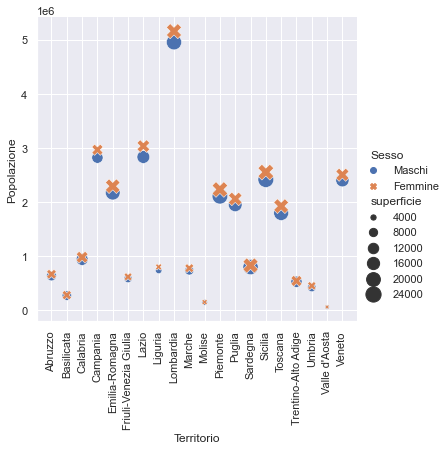

In [89]:
g=sns.relplot(x="Territorio", y="Popolazione", data=reg3, kind="scatter", 
              hue="Sesso", size="superficie", style="Sesso", sizes=(20,250));
g.set_xticklabels(rotation=90)